# Visualizing Chipotle's Data  图像化快餐店的数据

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [7]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 

# set this so the 
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [5]:
# x = chipo.item_name
# letter_counts = Counter(x)

Chips and Fresh Tomato Salsa             110
Izze                                      20
Nantucket Nectar                          27
Chips and Tomatillo-Green Chili Salsa     31
Chicken Bowl                             726
Side of Chips                            101
Steak Burrito                            368
Steak Soft Tacos                          55
Chips and Guacamole                      479
Chicken Crispy Tacos                      47
Chicken Soft Tacos                       115
Chicken Burrito                          553
Canned Soda                              104
Barbacoa Burrito                          91
Carnitas Burrito                          59
Carnitas Bowl                             68
Bottled Water                            162
Chips and Tomatillo Green Chili Salsa     43
Barbacoa Bowl                             66
Chips                                    211
Chicken Salad Bowl                       110
Steak Bowl                               211
Barbacoa S

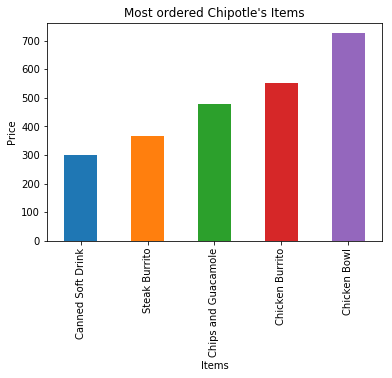

In [12]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')
print(df[0])
# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]
print(df)
# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price 创建一个散点图，显示每个订单价格下订单的商品数量
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
11               2       12.38
12               2       14.37
13               2       10.88
14               2       10.08
15               2       10.88
16               2       10.68
17               2       10.08
18               4       24.90
19               2       13.90
20               4       36.20
21               3       23.36
22               2       12.98
23               3       11.17
24               2       12.07
25               2       11.38
26               2       20.50
27               2       13.90
28               4       33.70
29               2       17.98
30               3       23.36
...     

(0, 36.7178857951459)

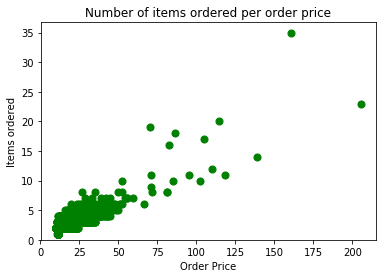

In [9]:
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space
# print(chipo.item_price)
# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()
print(orders)
# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### BONUS: Create a question and a graph to answer your own question.

In [13]:
a=chipo.item_price.value_counts()

In [16]:
a.index

Float64Index([ 8.75, 11.25,  9.25,  4.45,  8.49, 11.75,  1.25,  8.99,  2.15,
               2.95,   1.5,  1.09,  2.39, 10.98,  1.69,  3.99,  6.49, 11.48,
               3.39,  17.5,   2.5, 11.89,  2.18,   8.9, 16.98,  8.69,  9.39,
                4.3,  8.19,  22.5,  18.5,   7.4,   3.0, 11.08, 21.96,   5.9,
               3.75, 17.98,  3.89,  23.5, 10.58,   4.5,   8.5,   5.0,  4.78,
              26.25,  2.29,   4.0, 27.75,  3.27,  7.17, 22.16,   6.0, 23.78,
               6.78,  35.0, 16.38,  22.2,  7.98,   7.5,  4.36,  15.0, 44.25,
               1.99, 26.07, 33.75, 13.35, 12.98, 32.94,  6.45, 13.52,  5.07,
               17.8,  10.5, 22.96, 11.49, 35.25,  11.8],
             dtype='float64')

In [17]:
a.values

array([730, 521, 398, 349, 311, 284, 264, 246, 192, 174, 117, 106, 100,
        99,  99,  98,  53,  51,  45,  40,  27,  26,  22,  20,  19,  19,
        17,  17,  14,  13,  12,  11,  10,  10,  10,   8,   7,   7,   6,
         6,   5,   4,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
      dtype=int64)

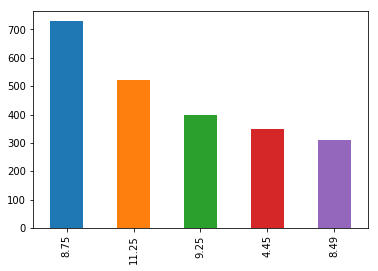

In [15]:
a.iloc[0:5].plot.bar()

In [31]:
# chipo.item_price=chipo.item_price.sort_values(ascending=False)

In [29]:
new_chipo=chipo.sort_values(by='item_price',ascending=False).head()

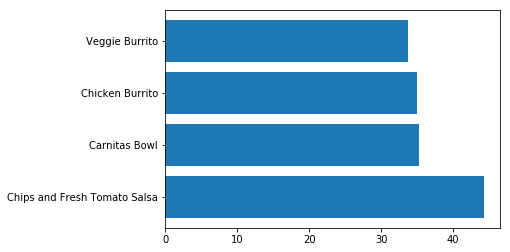

In [42]:
import pylab as pl
plt.barh(new_chipo.item_name,new_chipo.item_price)
pl.xticks(rotation=360)
plt.show()